In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [ ]:

!kaggle datasets download princelv84/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/princelv84/dogsvscats
License(s): MIT
 99% 541M/545M [00:02<00:00, 198MB/s]
100% 545M/545M [00:02<00:00, 212MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense , Conv2D , Flatten, MaxPooling2D
from keras import Sequential

✅ image_dataset_from_directory() Output

This function returns a:

👉 tf.data.Dataset object

Each batch is a tuple:

(images, labels)

Format:

images: (batch_size, height, width, channels) → float32 or uint8

labels: (batch_size,) → integer class IDs

Pixel values are not normalized by default.

✅Normalization Function Using map()
The function:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

What it does:

Divides pixel values by 255 → converts them to 0–1 range

Converts images to float32

Keeps labels unchanged

Applying it:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


map() tells TensorFlow:

“Apply this function to every batch in the dataset.”

This creates an efficient input pipeline without loading everything into RAM

In [ ]:
### generators are used to deal with large data , to send data in batches instead of as a whole so that it is RAM friendly


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
## CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , kernel_size =(3,3) , input_shape=(256,256,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64 ,  kernel_size =(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128 ,  kernel_size =(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_ds , epochs = 10 , validation_data = test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 82ms/step - accuracy: 0.6054 - loss: 0.6970 - val_accuracy: 0.7272 - val_loss: 0.5410
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7536 - loss: 0.5017 - val_accuracy: 0.7838 - val_loss: 0.4763
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8124 - loss: 0.4075 - val_accuracy: 0.7972 - val_loss: 0.4731
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8698 - loss: 0.2970 - val_accuracy: 0.7944 - val_loss: 0.5788
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9379 - loss: 0.1586 - val_accuracy: 0.7848 - val_loss: 0.7390
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9641 - loss: 0.0974 - val_accuracy: 0.7898 - val_loss: 0.8422
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9750 - loss: 0.0762 - val_accuracy: 0.7804 - val_loss: 0.9395
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.9820 - loss: 0.0514 - 

In [ ]:
import cv2

array([[[ 63,  94,  73],
        [ 92, 123, 102],
        [101, 132, 111],
        ...,
        [ 33,  76,  39],
        [ 38,  81,  44],
        [ 16,  59,  22]],

       [[ 68,  99,  78],
        [ 69, 100,  79],
        [ 77, 108,  87],
        ...,
        [ 44,  87,  50],
        [ 47,  90,  53],
        [ 33,  76,  39]],

       [[ 55,  87,  63],
        [ 47,  79,  55],
        [ 52,  84,  60],
        ...,
        [ 39,  83,  44],
        [ 40,  84,  45],
        [ 36,  80,  41]],

       ...,

       [[ 34,  53,  36],
        [ 36,  56,  37],
        [ 13,  33,  14],
        ...,
        [ 21,  47,  29],
        [ 19,  45,  27],
        [ 14,  40,  22]],

       [[ 25,  44,  27],
        [ 34,  54,  35],
        [ 12,  32,  13],
        ...,
        [  4,  30,  12],
        [  7,  33,  15],
        [  5,  31,  13]],

       [[ 57,  76,  59],
        [ 65,  85,  66],
        [ 31,  51,  32],
        ...,
        [  7,  33,  15],
        [  4,  30,  12],
        [  0,  23,   5]]], dtype=uint8)
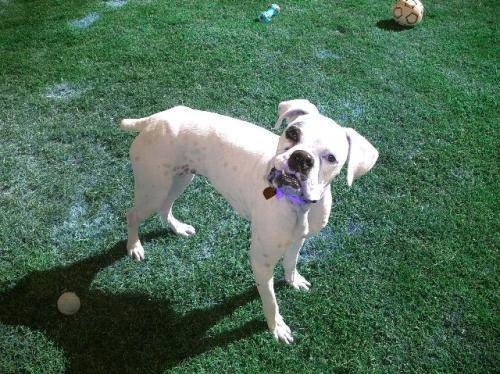

In [ ]:
open_img = cv2.imread('/content/test/dogs/dog.10028.jpg')
open_img

In [ ]:
##normalize test_img
open_img.shape

(374, 500, 3)

In [ ]:
open_img = cv2.resize(open_img , (256,256))

In [ ]:
test_input = open_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1.]], dtype=float32)

In [ ]:
## the prediction of 0 - > cats and 1 -> dogs as per the serial of training data